# Problem: Breast Cancer Classification

### Method: Logistic Regression

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1-) Data Analysis

In [155]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

In [156]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [157]:
df.size

17639

In [158]:
df.shape

(569, 31)

In [159]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [160]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


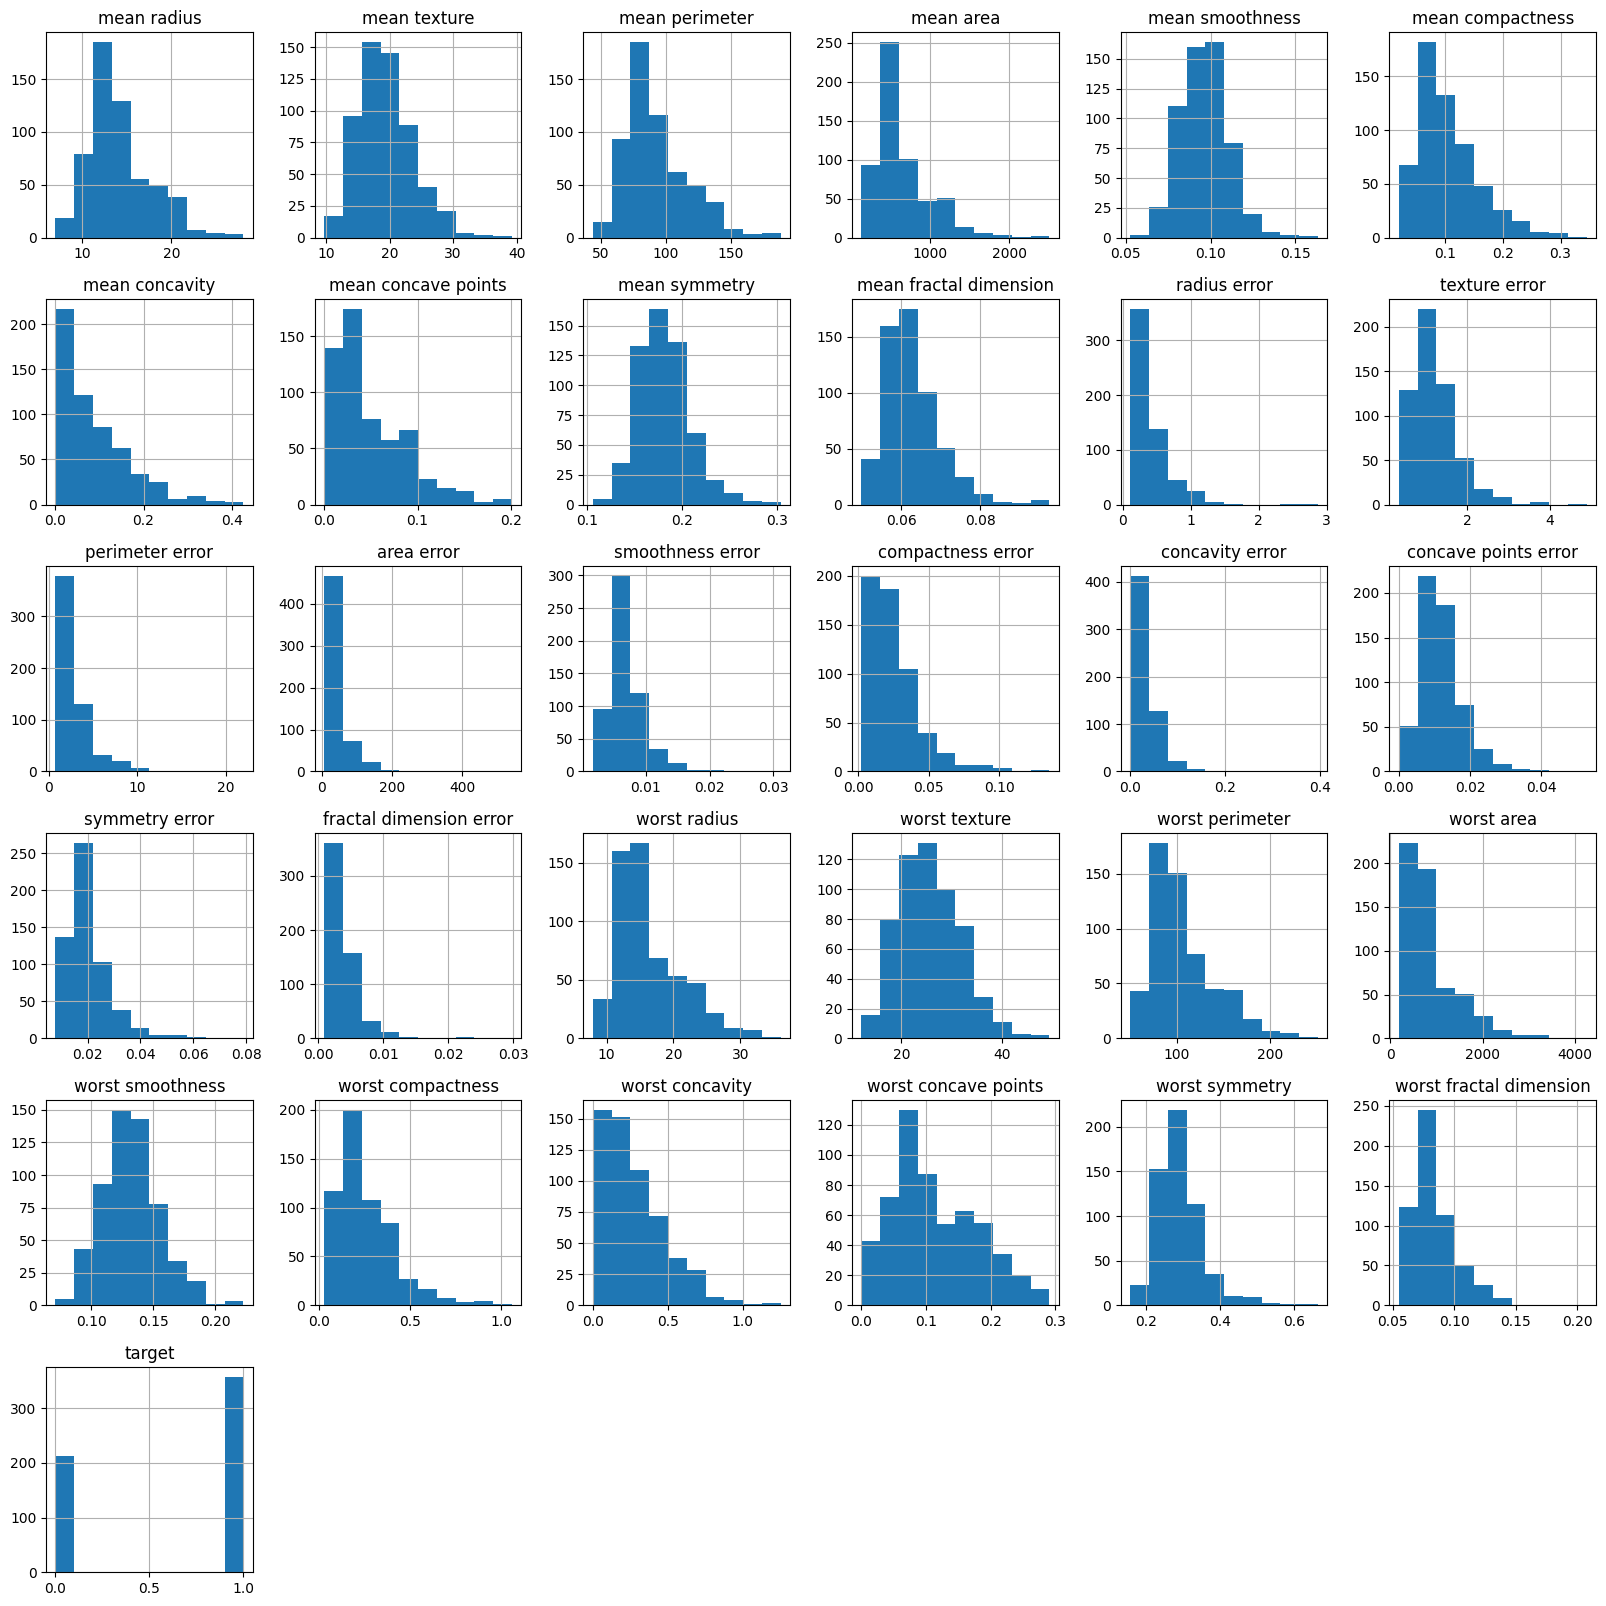

In [161]:
df.hist(figsize=(20,20))
plt.show()

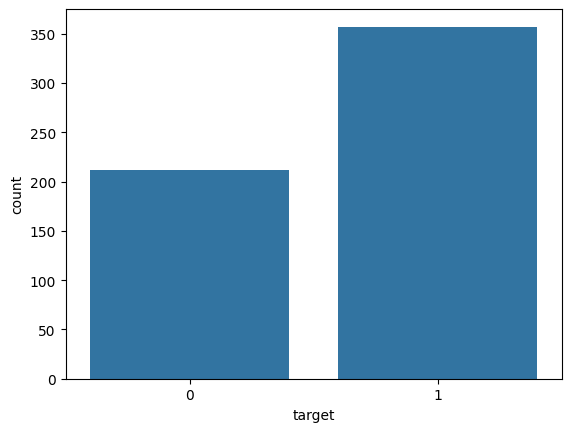

In [162]:
#1 -> iyi huylu
#2 -> kötü huylu
sns.countplot(x="target", data=df)
plt.show()

In [163]:
df.isnull().values.any()

False

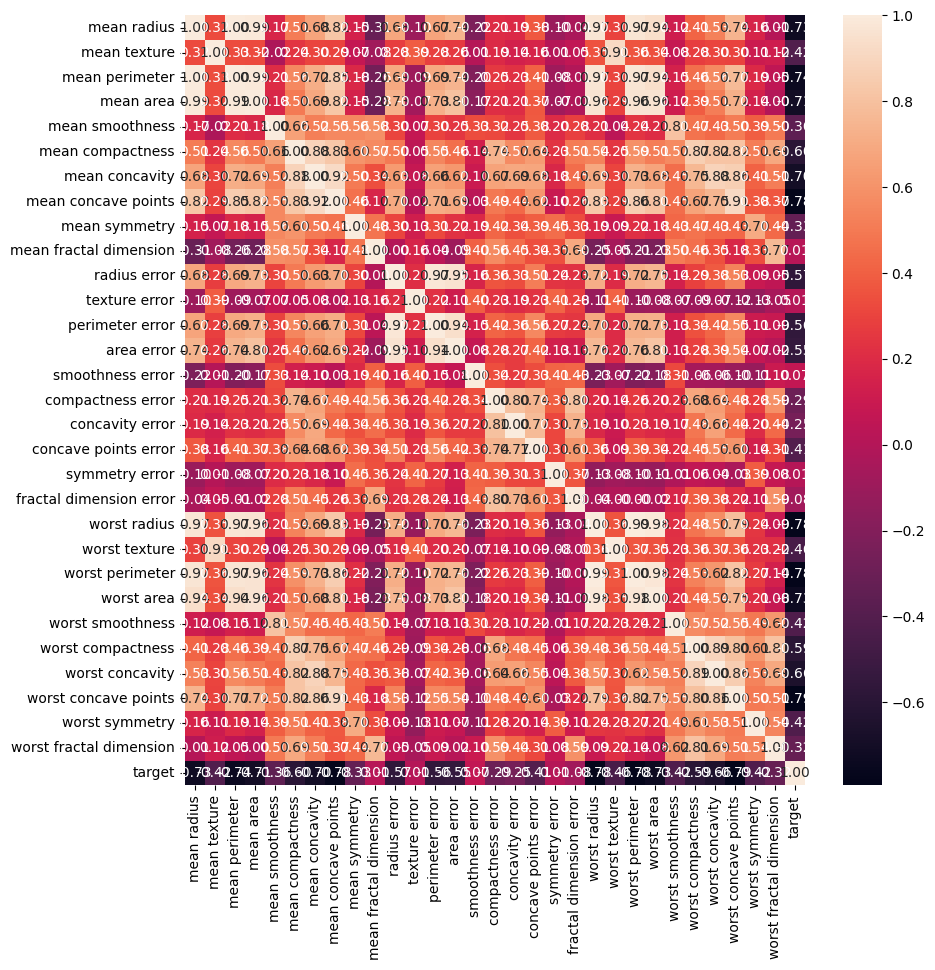

In [164]:
# Corelations
corr_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

# 2-) Data Preparation

In [165]:
data = load_breast_cancer()

X = data.data
y = data.target

In [166]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, random_state=42) #%70-%30
X_test, X_val, y_test, y_val = train_test_split(X_temp,y_temp, test_size=0.5, random_state=42) #%15-%15

In [167]:
print(f"size of X_train {len(X_train)}")
print(f"size of y_train {len(y_train)}")
print(f"size of X_val {len(X_val)}")
print(f"size of y_val {len(y_val)}")
print(f"size of X_test {len(X_test)}")
print(f"size of y_test {len(y_test)}")

size of X_train 398
size of y_train 398
size of X_val 86
size of y_val 86
size of X_test 85
size of y_test 85


In [168]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

# 3-) Update Weights And Bias Manual

## Weights, bias and Learning rate

In [169]:
lr = 0.01

weights = np.random.normal(0,1,30)

bias = 0.1

In [170]:
weights.size

30

In [171]:
weights

array([ 0.0218471 ,  0.05863457, -2.07522105, -0.07409772, -1.37210598,
        1.14460858, -0.5715551 ,  1.07866065,  0.52932141, -1.39729439,
       -0.82963121, -1.09818827, -1.05878643, -1.63497726, -0.38850189,
        1.00942644, -0.87129465,  0.20374901, -0.2456599 ,  0.89870803,
       -0.5326519 ,  0.08035544,  0.16861886, -0.96467406,  0.25325682,
       -0.59633376, -0.95627155, -0.07730197, -0.43780683,  0.00972555])

In [172]:
X_scaled = scaler.fit_transform(X)

## net girdi hesaplama

z = np.dot(X,weights)+bias

z = [w]*[x]+b

In [173]:
Z = np.dot(X_scaled, weights) + bias

In [174]:
len(Z)

569

## sigmoid and y_prob

In [175]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [176]:
y_prob = sigmoid(Z)

## Loss

In [177]:
def compute_loss(y, y_pred):
    epsilon = 1e-5 # logaritma negatif çıkmasını engellemek için
    return -np.mean(y*np.log(y_pred + epsilon)+(1-y)*np.log(1-y_pred+epsilon))

In [178]:
compute_loss(y,y_prob)

0.2304149836719521

## Compute Gradients

In [179]:
def compute_gradients(X, y, y_pred):
    return np.dot(X.T, (y_pred-y))/len(y)

In [180]:
grads = compute_gradients(X_scaled, y, y_prob)
grads

array([ 0.05212815,  0.04000248,  0.05141191,  0.04361859, -0.0278348 ,
        0.01526865,  0.01844044,  0.03432915, -0.00956112, -0.05308815,
       -0.01506598, -0.08899675, -0.0122095 ,  0.00374545, -0.06440979,
       -0.01506865, -0.03585164, -0.01918358, -0.06195822, -0.04622482,
        0.0536724 ,  0.04874793,  0.05396139,  0.04307481,  0.01986014,
        0.04910459,  0.04083364,  0.063549  ,  0.04306996,  0.01928658])

In [181]:
#bias
grads_b = np.mean(y_prob -y)
grads_b

-0.003931038976304726

In [205]:
new_weights = weights-lr*grads
new_weights

array([ 0.02132581,  0.05823455, -2.07573517, -0.0745339 , -1.37182763,
        1.1444559 , -0.5717395 ,  1.07831736,  0.52941702, -1.39676351,
       -0.82948055, -1.0972983 , -1.05866433, -1.63501472, -0.38785779,
        1.00957713, -0.87093614,  0.20394085, -0.24504032,  0.89917028,
       -0.53318863,  0.07986796,  0.16807925, -0.96510481,  0.25305822,
       -0.59682481, -0.95667989, -0.07793746, -0.43823753,  0.00953268])

In [183]:
#bias
new_b = bias -lr*grads_b
new_b

0.10003931038976305

## Functions

In [199]:
def get_best_weights(X, y, bias = 0.1,lr = 0.01):
    weights = np.random.normal(0,1,30)

    Z = np.dot(X, weights) + bias
    y_prob = sigmoid(Z)
    loss_initial = compute_loss(y,y_prob)

    for i in range(0,100):
        Z = np.dot(X, weights) + bias
        y_prob = sigmoid(Z)
        loss = compute_loss(y,y_prob)

        grads = compute_gradients(X_scaled, y, y_prob)
        grads_b = np.mean(y_prob -y)

        new_weights = weights-lr*grads
        new_b = bias -lr*grads_b

    return new_weights, new_b


In [201]:
get_best_weights(X_scaled,y)

(array([ 0.77140469, -0.40125142, -2.44805021, -1.3160227 , -1.29969759,
        -0.51806454, -3.94520201,  2.47853513, -0.62442816, -0.36298769,
        -0.10770996,  0.39224247,  0.77936913,  0.45011329, -0.30340473,
        -0.15166581, -0.45515326,  1.34180193, -0.97936447,  2.04220713,
         0.25267761, -0.44573301, -0.95759129, -0.07973353,  0.15461194,
         0.13569154,  1.25710526, -0.36191865, -0.6921488 , -1.86165962]),
 0.10035092195440048)